# Latest COVID-19 India Matplotlib Overview

In [1]:
#hide
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline
from datetime import date

/opt/hostedtoolcache/Python/3.6.12/x64/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.0) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
#hide
df  = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')
df = df[['Date','State','Confirmed','Deceased']]
df = df.rename(columns={'Confirmed':'Cases', "Deceased":'Deaths'})
df_cases = df[["Date",'State','Cases']]
df_deaths = df[['Date','State','Deaths']]
df_cases1 = df_cases.groupby('Date')
df_deaths1= df_deaths.groupby('Date')

In [3]:
#hide
df_snap = pd.read_csv('data/SnapshotCases-28-July.csv')
arr_states = df_snap['states'].unique()
arr_dates = df['Date'].unique()
df_snap = df_snap.set_index('states')

In [4]:
#hide
arr_states[-9] = 'Puducherry'
arr_states[-10] = 'Odisha'
arr_states[6] = 'Dadra and Nagar Haveli and Daman and Diu'
arr_states = np.append(arr_states,np.array(['Chhattisgarh','Ladakh','Uttarakhand']))
arr_states

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chhattisgarh', 'Ladakh', 'Uttarakhand'],
      dtype=object)

In [5]:
#hide
dates = []
for i in arr_dates:
    if i>='2020-07-01':
        dates.append(i)
dict = {'states':dates}
for i in arr_states:
    dict[i] = [0]*len(dates)
dft_cases = pd.DataFrame(dict)
dft_deaths = pd.DataFrame(dict)


In [6]:
#hide
for i in range(len(dates)):
    df1_deaths = df_deaths1.get_group(dates[i])
    for j in range(len(df1_deaths.index)):
        if df1_deaths.iloc[j,1] in arr_states:
            dft_deaths.loc[i,df1_deaths.iloc[j,1]] = df1_deaths.iloc[j,2]
dft_deaths = dft_deaths.set_index('states')

In [7]:
#hide
for i in range(len(dates)):
    df1_cases = df_cases1.get_group(dates[i])
    for j in range(len(df1_cases.index)):
        if df1_cases.iloc[j,1] in arr_states:
            dft_cases.loc[i,df1_cases.iloc[j,1]] = df1_cases.iloc[j,2]
dft_cases = dft_cases.set_index('states')

In [8]:
#hide
dft_cases = dft_cases.T
dft_deaths = dft_deaths.T
dt_today = dates[-1]
dt_yday = dates[-2]

In [9]:
#hide
dft_cases = dft_cases.reset_index()
dft_deaths = dft_deaths.reset_index()
dft_cases = dft_cases.rename(columns = {'index':'state'})
dft_deaths = dft_deaths.rename(columns = {'index':'state'})

In [10]:
#hide
dfc_cases = dft_cases.groupby('state')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('state')[dt_today].sum()
dfp_cases = dft_cases.groupby('state')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('state')[dt_yday].sum()

In [11]:
#hide
df_table = pd.DataFrame({'states': dfc_cases.index, 'Cases': dfc_cases.values, 'Deaths': dfc_deaths.values, 'PCases': dfp_cases.values, 'PDeaths': dfp_deaths.values}).set_index('states')
df_table = df_table.sort_values(by = ['Cases','Deaths'], ascending = [False, False])
df_table = df_table.reset_index()
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,Maharashtra,1726926,45435,1726926,45435
1,Karnataka,851212,11430,851212,11430
2,Andhra Pradesh,847977,6828,846245,6814
3,Tamil Nadu,748225,11387,748225,11387
4,Kerala,502720,1772,495713,1743


In [12]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [13]:
#hide
df_table.head()

,states,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,Maharashtra,1726926,45435,1726926,45435,0,0,2.63
1,Karnataka,851212,11430,851212,11430,0,0,1.34
2,Andhra Pradesh,847977,6828,846245,6814,1732,14,0.81
3,Tamil Nadu,748225,11387,748225,11387,0,0,1.52
4,Kerala,502720,1772,495713,1743,7007,29,0.35


In [14]:
#hide
summary = {'updated':dates[-1], 'since':dates[-2]}
list_names = ['Cases', 'PCases', 'Deaths', 'PDeaths', 'Cases (+)', 'Deaths (+)']
for name in list_names:
    summary[name] = df_table.sum()[name]
summary

{'updated': '2020-11-11',
 'since': '2020-11-10',
 'Cases': 8656540,
 'PCases': 8635754,
 'Deaths': 127784,
 'PDeaths': 127615,
 'Cases (+)': 20786,
 'Deaths (+)': 169}

In [15]:
#hide
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''

In [16]:
#hide_input
update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

display(html)

In [17]:
#hide
dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('state')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = dates[-1], ascending = False,inplace = True)

In [18]:
#hide
dft_ct_new_cases.head()

states,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11
state,,,,,,,,,,,,,,,,,,,,,
Kerala,0,160,211,240,225,193,272,301,339,416,...,4138,6862,8516,6820,7002,7201,5440,3593,6010,7007
West Bengal,0,649,669,743,895,861,850,986,1088,1198,...,3957,3981,3987,3948,3942,3928,3920,3907,3891,3872
Rajasthan,0,350,390,480,632,524,716,659,500,611,...,1748,1725,1770,1810,1797,1841,1872,1859,1902,2080
Andhra Pradesh,0,845,837,765,998,1322,1178,1062,1555,1608,...,1916,2849,2477,2745,2410,2367,2237,1392,1886,1732
Odisha,0,229,561,495,469,456,571,527,577,755,...,1389,1201,1474,1385,1494,1372,1434,1219,987,1220


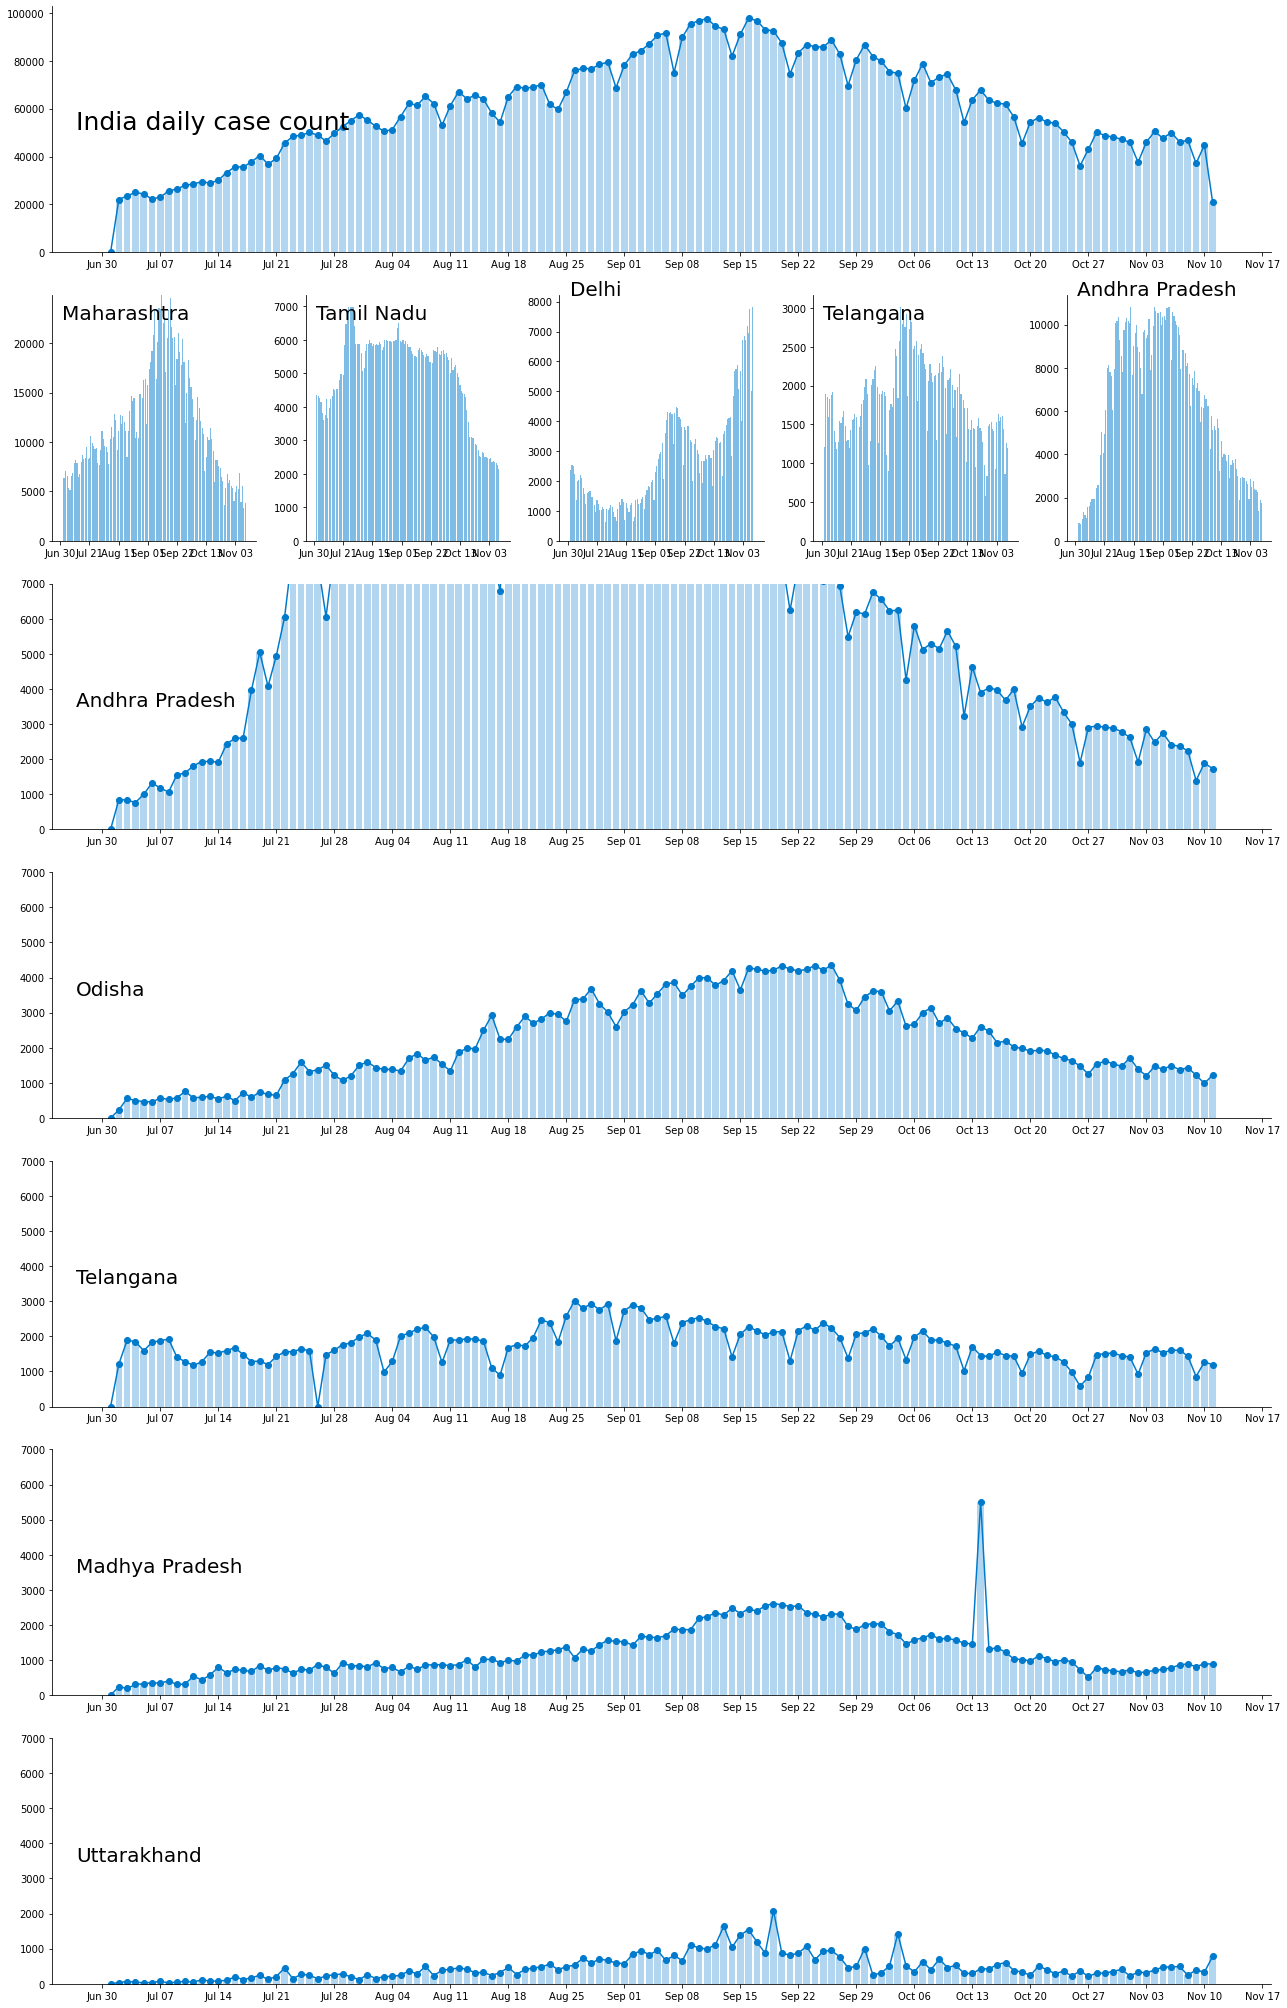

In [19]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
n = 5
ax = []
fig = plt.figure(figsize = (18,28))
gs = fig.add_gridspec(n+2, 5)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['Maharashtra'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.Maharashtra,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.Maharashtra.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.9,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['Tamil Nadu'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['Tamil Nadu'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.9,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax5 = fig.add_subplot(gs[1,3])
ef = df.loc['Telangana'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax5.bar(ef.date, ef['Telangana'],color = '#007acc',alpha=0.5,)
ax5.xaxis.set_major_locator(mdates.WeekdayLocator())
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax5.set_xticks(ax5.get_xticks()[::3])
ax5.text(0.05, 0.9,'Telangana', transform = ax5.transAxes, fontsize=20);
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

ax6 = fig.add_subplot(gs[1,4])
ef = df.loc['Andhra Pradesh'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax6.bar(ef.date, ef['Andhra Pradesh'],color = '#007acc',alpha=0.5,)
ax6.xaxis.set_major_locator(mdates.WeekdayLocator())
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax6.set_xticks(ax6.get_xticks()[::3])
ax6.text(0.05, 1,'Andhra Pradesh', transform = ax6.transAxes, fontsize=20);
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['Delhi'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.Delhi,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 1,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,7000])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()


In [20]:
#hide_input
print(df_table.to_string(index=False))

                                   states    Cases  Deaths   PCases  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
                              Maharashtra  1726926   45435  1726926    45435          0           0           2.63
                                Karnataka   851212   11430   851212    11430          0           0           1.34
                           Andhra Pradesh   847977    6828   846245     6814       1732          14           0.81
                               Tamil Nadu   748225   11387   748225    11387          0           0           1.52
                                   Kerala   502720    1772   495713     1743       7007          29           0.35
                            Uttar Pradesh   501311    7261   501311     7261          0           0           1.45
                                    Delhi   451382    7143   451382     7143          0           0           1.58
                              West Bengal   416984    7452   413112     7403    